# Visualizing Automobile Data for Regression

In [1]:
library('AzureML')
ws <- workspace()
auto_price <- download.datasets(ws, 'Automobile price data (Raw)')

# Coerce some character columns to numeric
cols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
auto_price[, cols] <- lapply(auto_price[, cols],
                             function(x) ifelse(x == '?', NA, x))
auto_price[, cols] <- lapply(auto_price[, cols], as.numeric)
    
# Remove rows with NAs
auto_price <- auto_price[complete.cases(auto_price), ]
    
# Add a log transformed column for price
auto_price$lnprice <- log(auto_price$price)
    
# Consolidate the number of cylinders
auto_price$num.of.cylinders <- ifelse(
    auto_price$num.of.cylinders %in% c('four', 'three'),
    'three-four',
    ifelse(auto_price$num.of.cylinders %in% c('five', 'six'),
           'five-six', 'eight-twelve'))
head(auto_price)

symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price,lnprice
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095
2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,9.632335


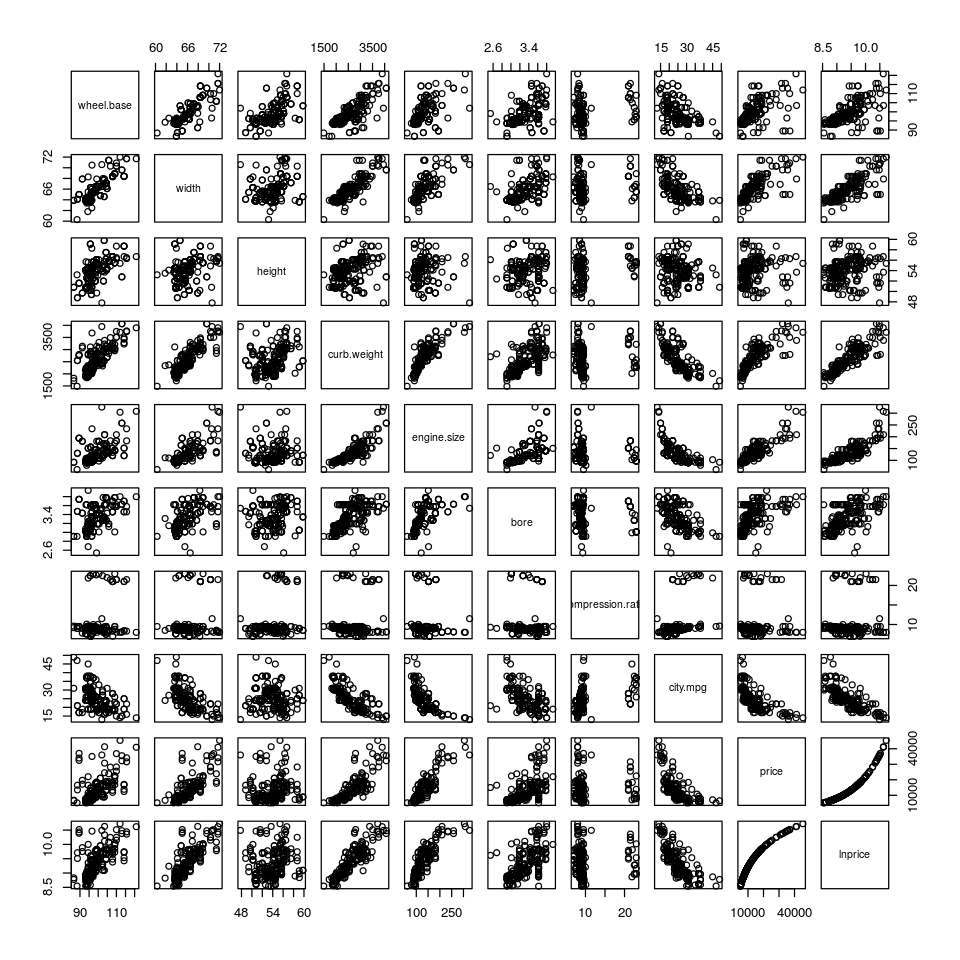

In [2]:
library(ggplot2)
library(repr)
options(repr.plot.width = 8, repr.plot.height = 8)
num_cols <- c('wheel.base', 'width', 'height', 'curb.weight',
             'engine.size', 'bore', 'compression.ratio',
              'city.mpg', 'price', 'lnprice')
pairs(~ ., data = auto_price[, num_cols])

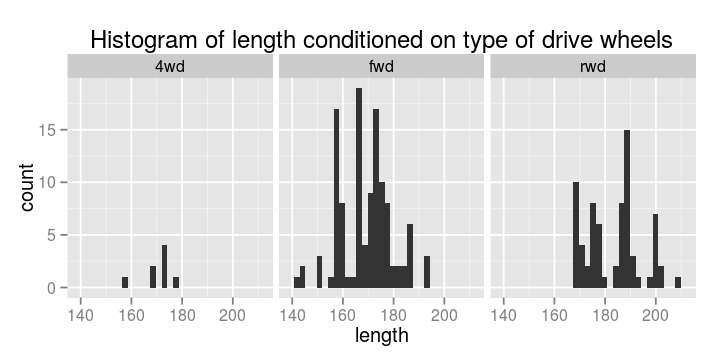

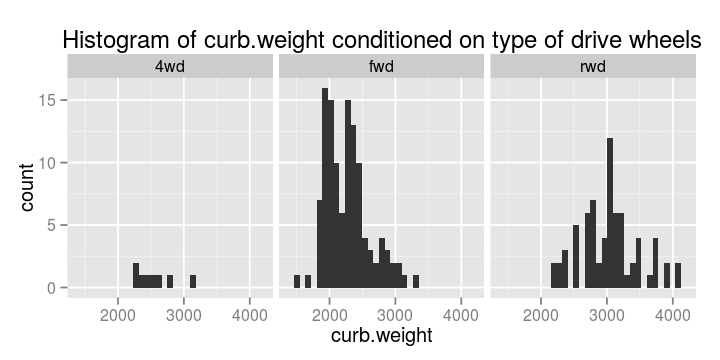

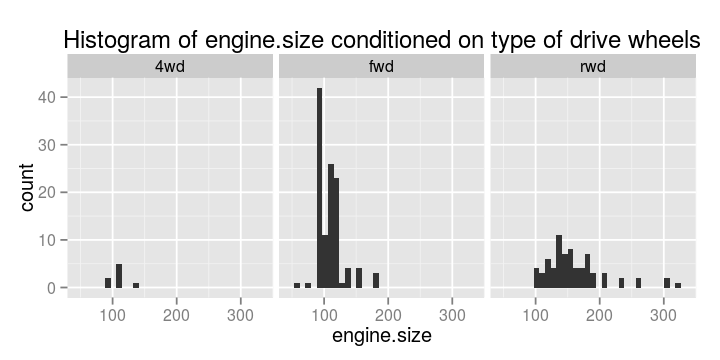

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


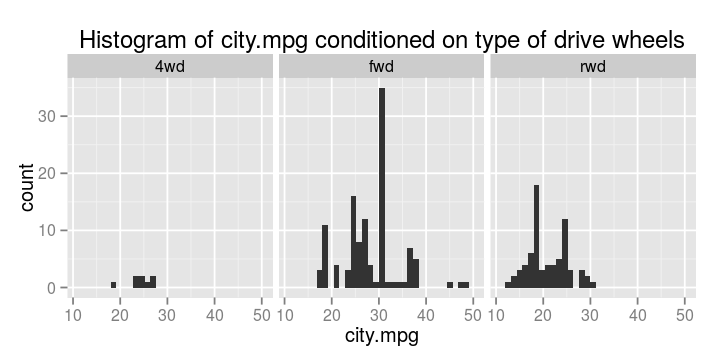

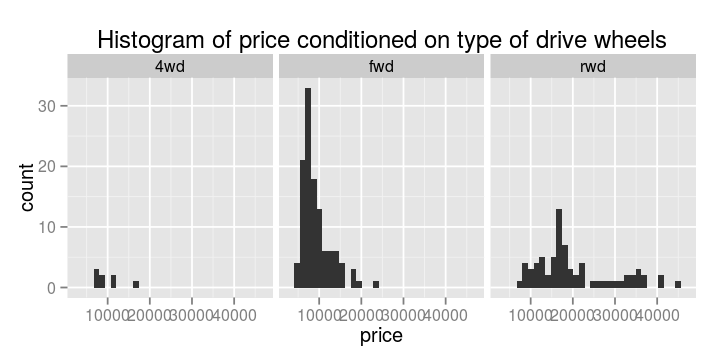

In [8]:
# Function to plot conditioned histograms
options(repr.plot.width = 6, repr.plot.height = 3)
auto_hist <- function(x) {
    library(gridExtra)
    # Compute the bin width
    rg <- range(auto_price[, x])
    bw <- (rg[2] - rg[1]) / 30
    #bw <- diff(range(auto_price[, x])) / (2 * IQR(auto_price[, x])
    #                                      / length(auto_price[, x])
    #                                      ^ (1/3))
    
    # Define the title
    title <- paste('Histogram of', x,
                   'conditioned on type of drive wheels')
    
    # Create the histogram
    ggplot(auto_price, aes_string(x)) +
    geom_histogram(aes(y = ..count..), binwidth = bw) +
    facet_grid(. ~ drive.wheels) + ggtitle(title)
}

# Create histograms for specified features
plot_cols2 <- c('length', 'curb.weight', 'engine.size',
                'city.mpg', 'price')
lapply(plot_cols2, auto_hist)

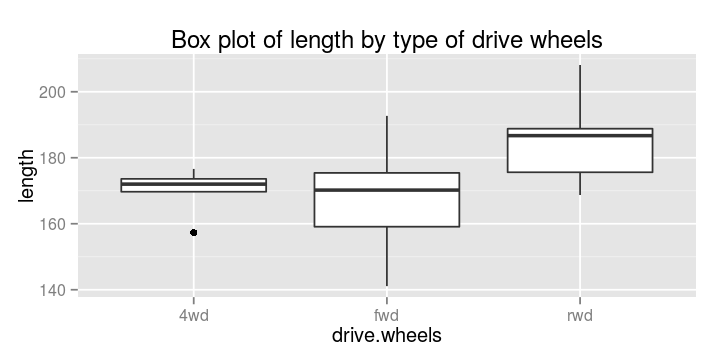

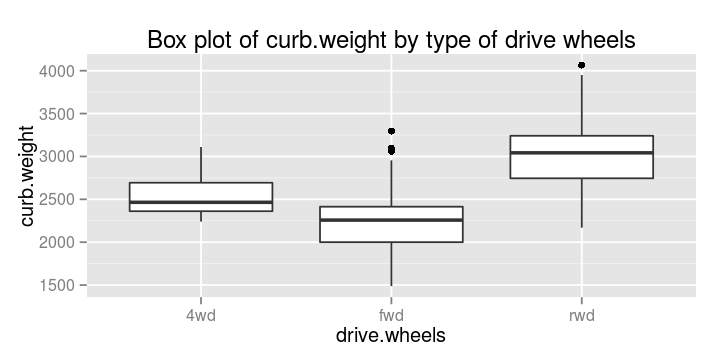

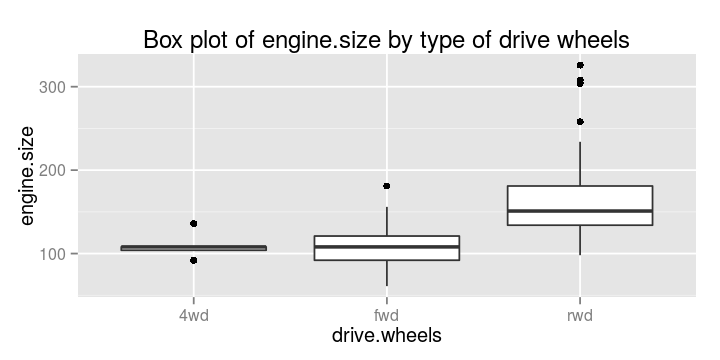

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


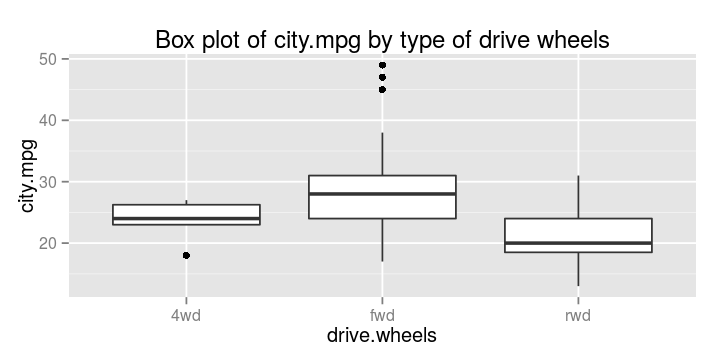

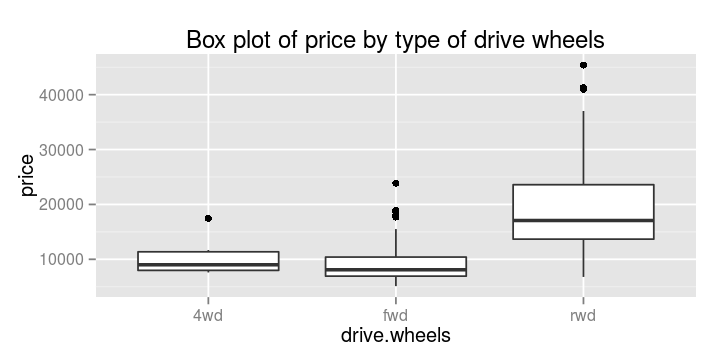

In [9]:
# Function to create conditioned box plots
auto_box <- function(x) {
    title <- paste('Box plot of', x, 'by type of drive wheels')
    ggplot(auto_price, aes_string('drive.wheels', x)) +
    geom_boxplot() + ggtitle(title)
}
lapply(plot_cols2, auto_box)

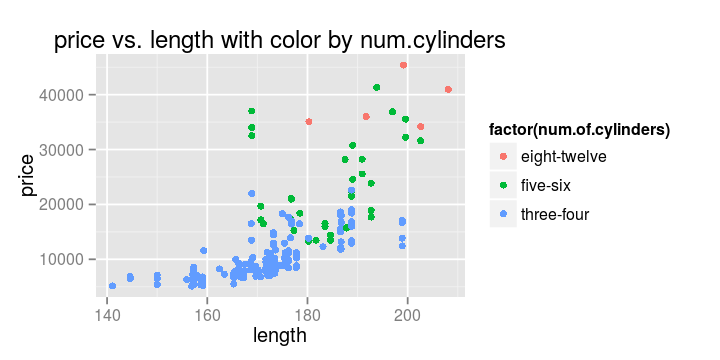

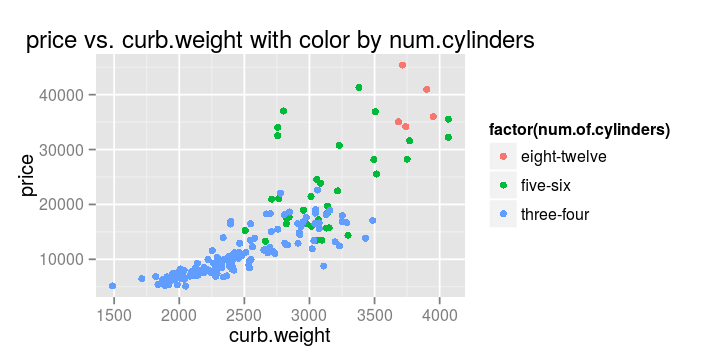

[[1]]

[[2]]

[[3]]

[[4]]


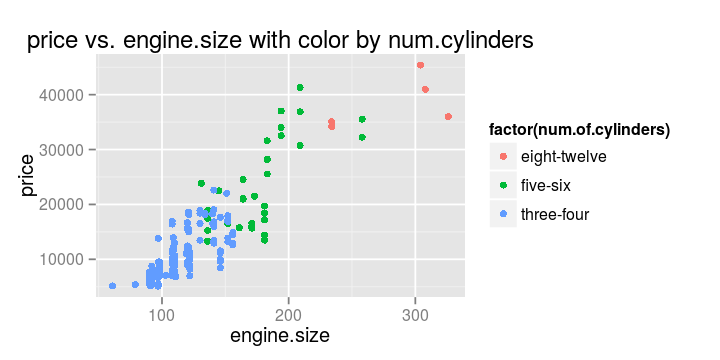

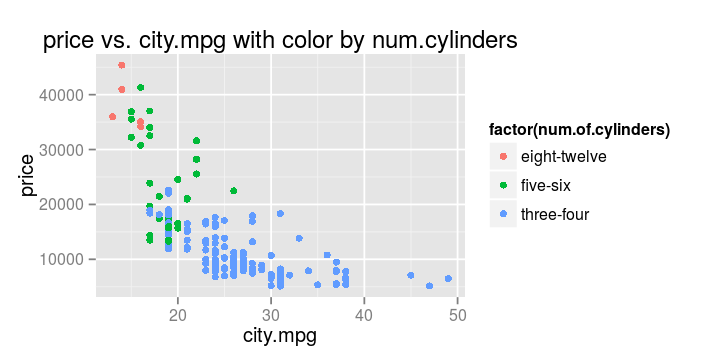

In [12]:
# Scatter plot using color to differentiate points
auto_scatter <- function(x) {
    title <- paste('price vs.', x,
                   'with color by num.of.cylinders')
    ggplot(auto_price, aes_string(x, 'price')) +
    geom_point(aes(color = factor(num.of.cylinders))) +
    ggtitle(title)
}

# Define columns for making scatter plots
plot_cols3 <- c('length', 'curb.weight', 'engine.size',
                'city.mpg')
lapply(plot_cols3, auto_scatter)

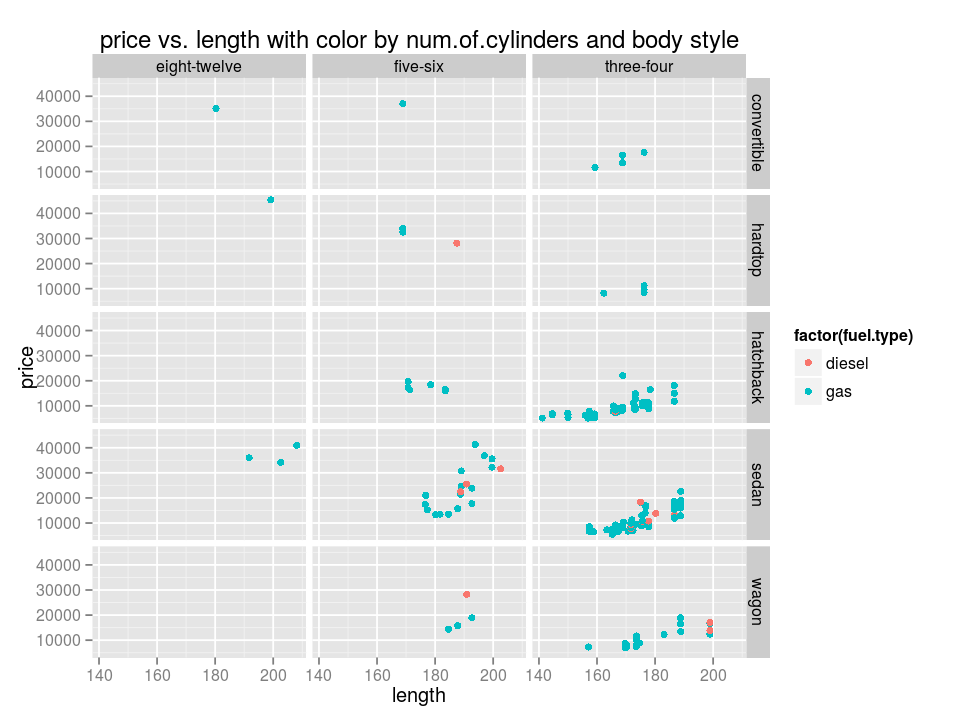

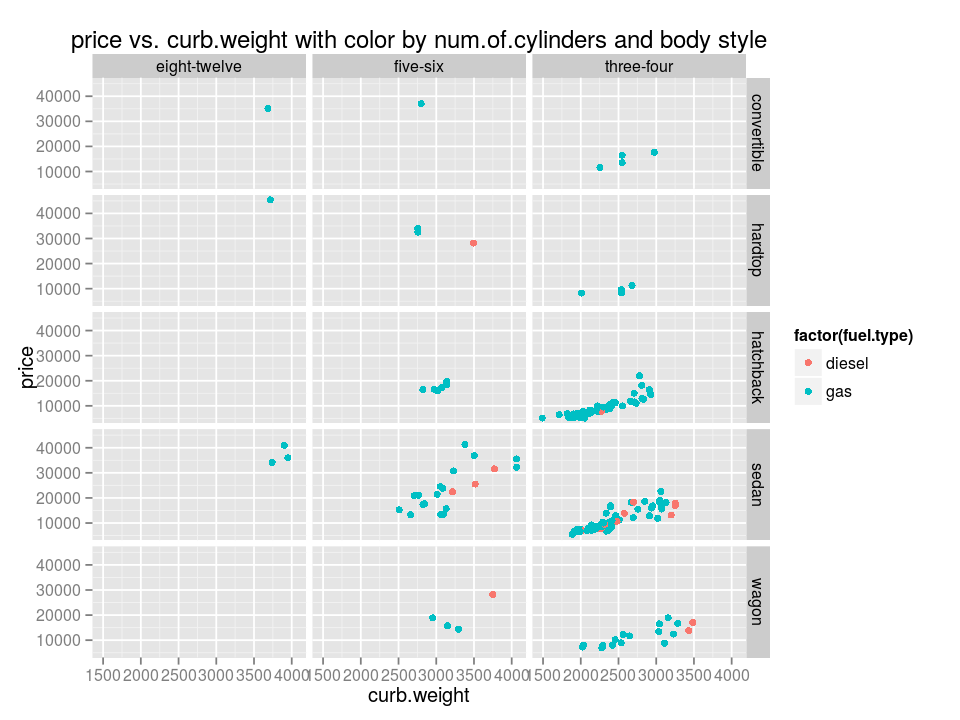

[[1]]

[[2]]

[[3]]

[[4]]


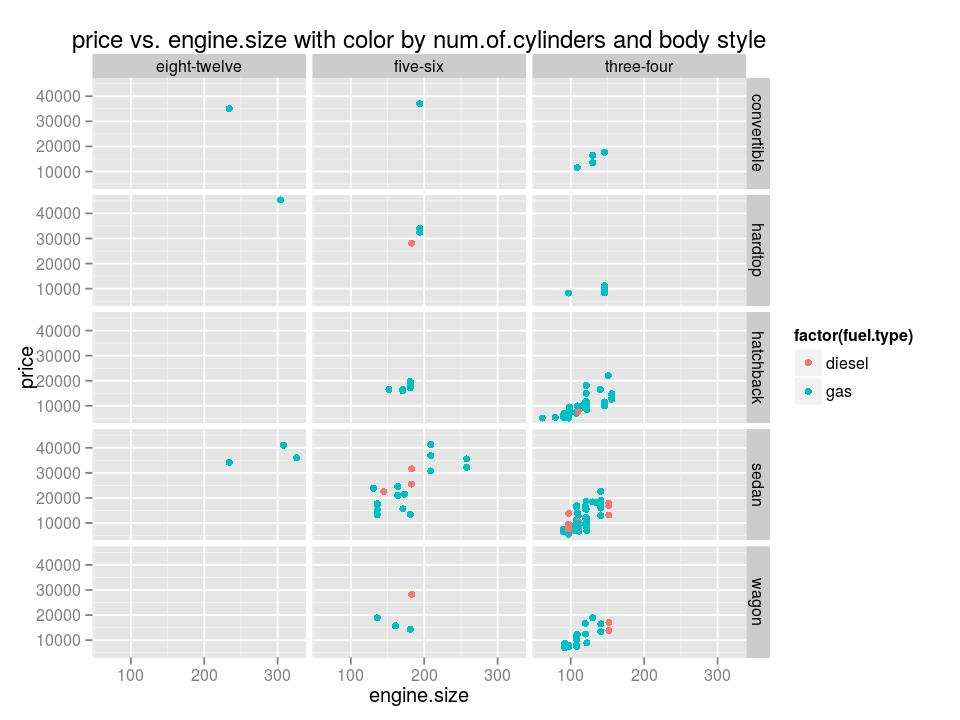

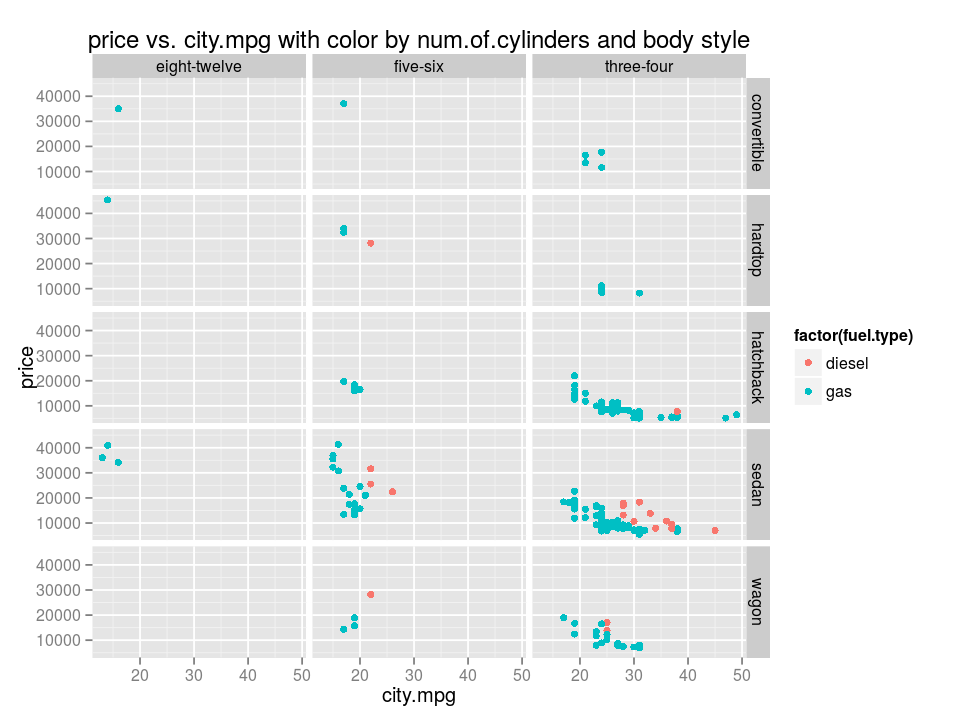

In [14]:
# Conditioned scatter plots
auto_cond_scatter <- function(x) {
    title <- paste('price vs.', x,
                   'with color by num.of.cylinders and body style'
                  )
    ggplot(auto_price, aes_string(x, 'price')) +
    geom_point(aes(color = factor(fuel.type))) +
    facet_grid(body.style ~ num.of.cylinders) + ggtitle(title)
}
options(repr.plot.width = 8, repr.plot.height = 6)
lapply(plot_cols3, auto_cond_scatter)

# Visualizing Adult Census Data for Classification

In [16]:
income <- download.datasets(ws,
                            'Adult Census Income Binary Classification dataset')
str(income)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native.countr

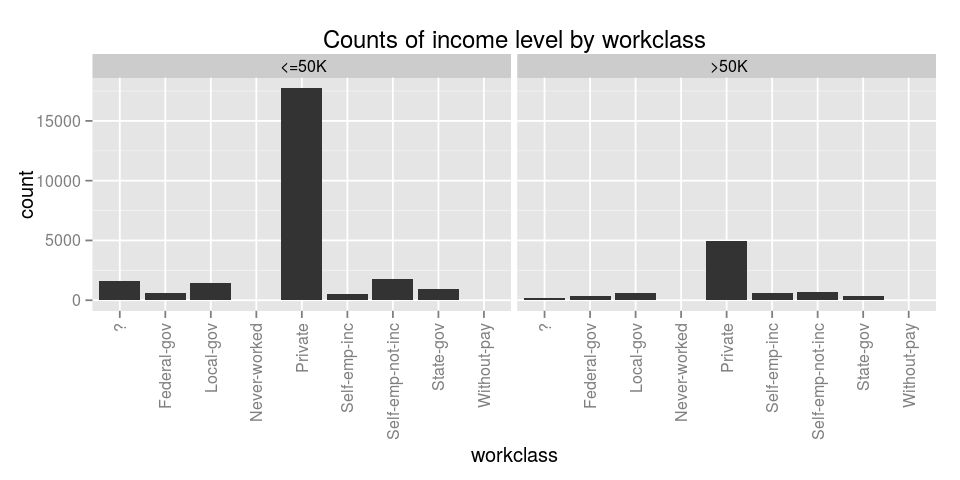

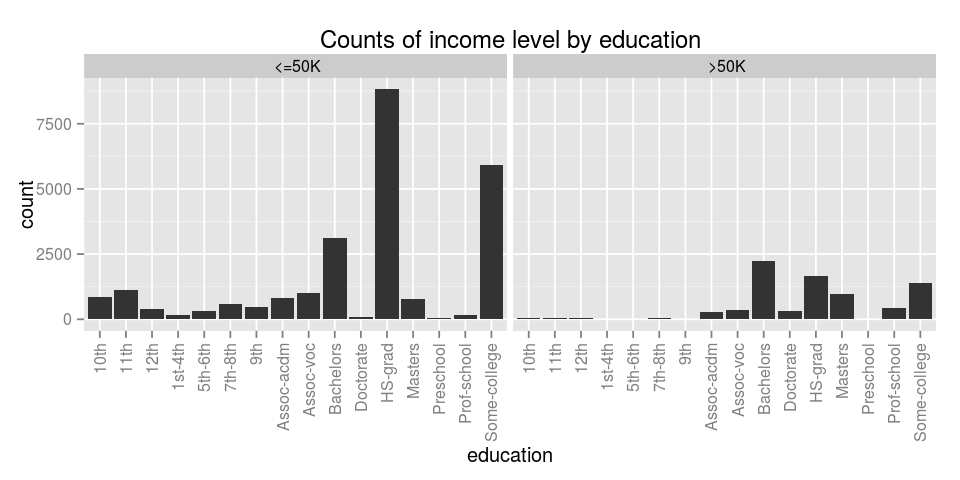

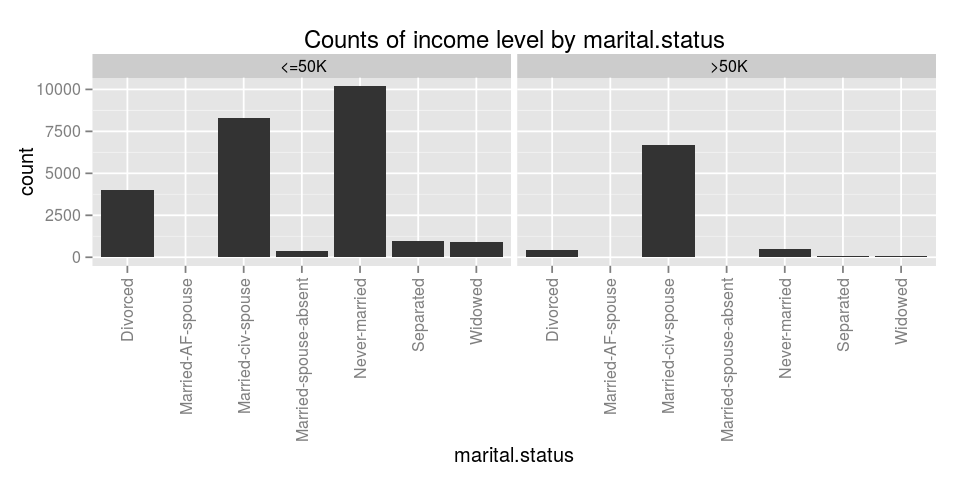

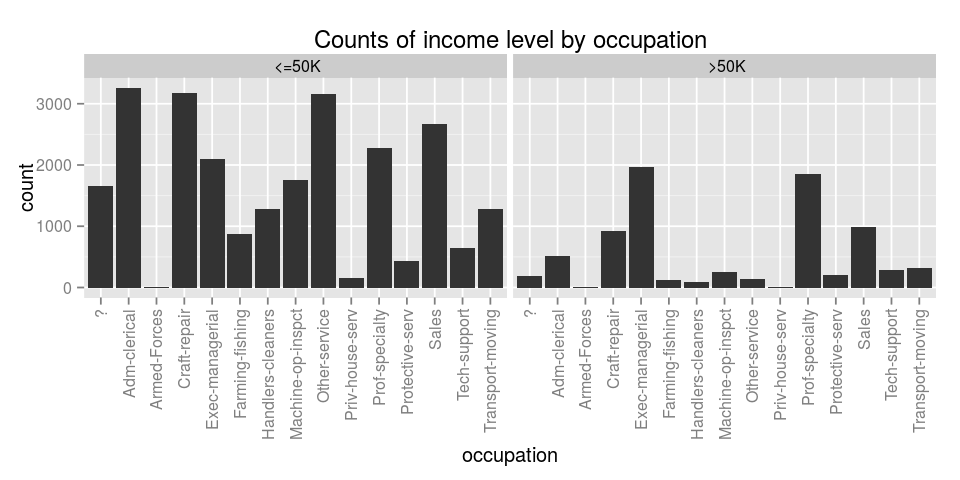

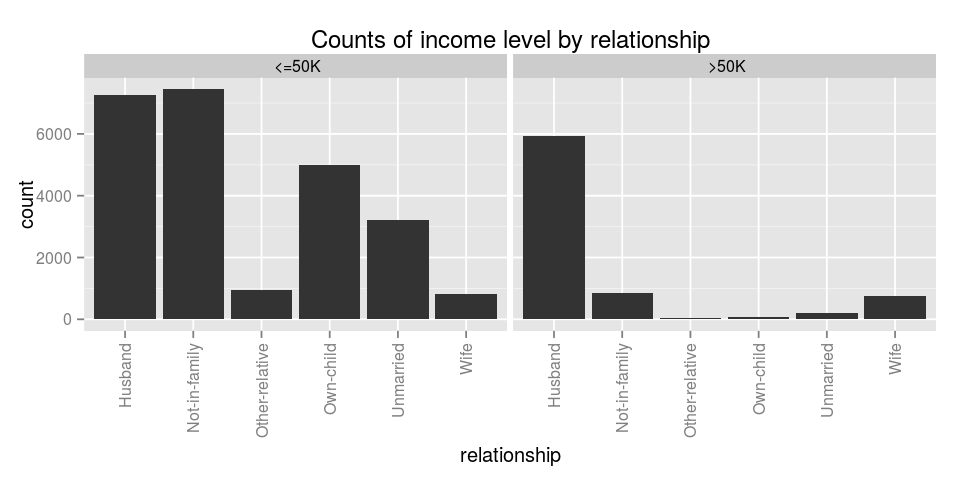

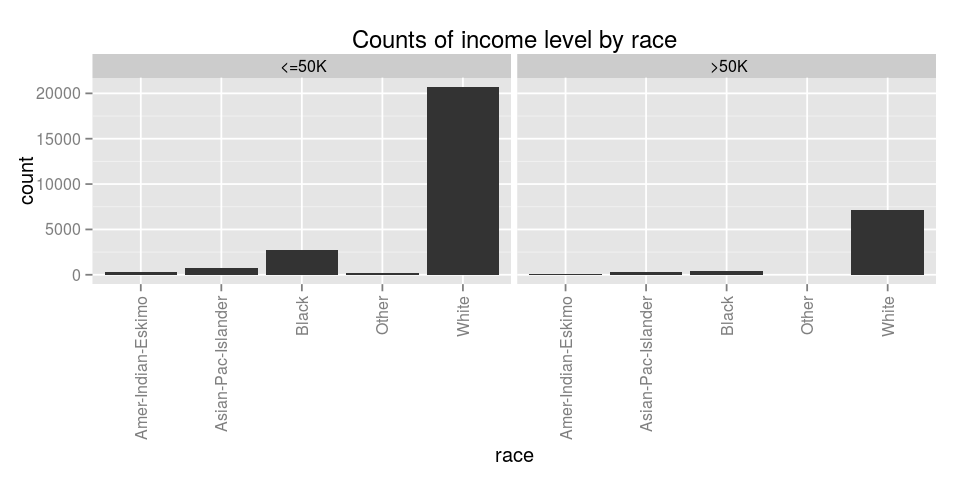

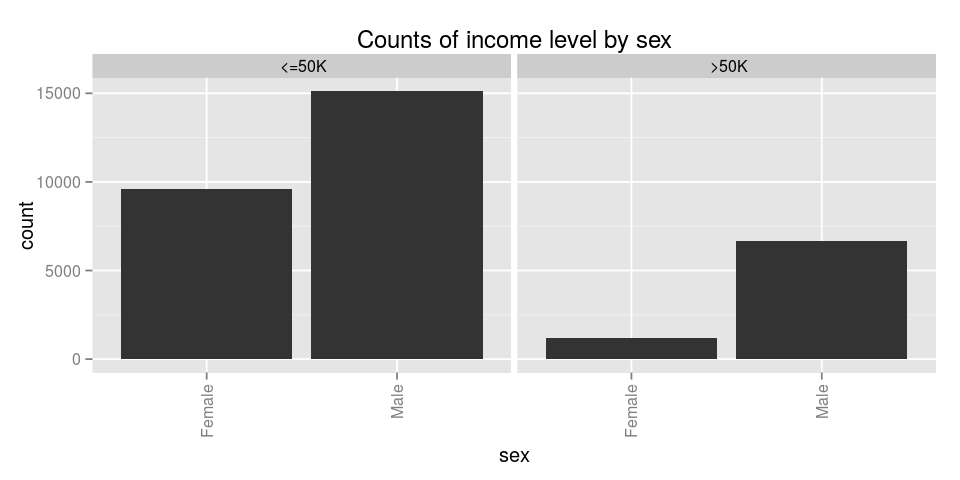

[[1]]
NULL

[[2]]
character(0)

[[3]]
NULL

[[4]]
character(0)

[[5]]
NULL

[[6]]
character(0)

[[7]]
character(0)

[[8]]
character(0)

[[9]]
character(0)

[[10]]
character(0)

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
character(0)

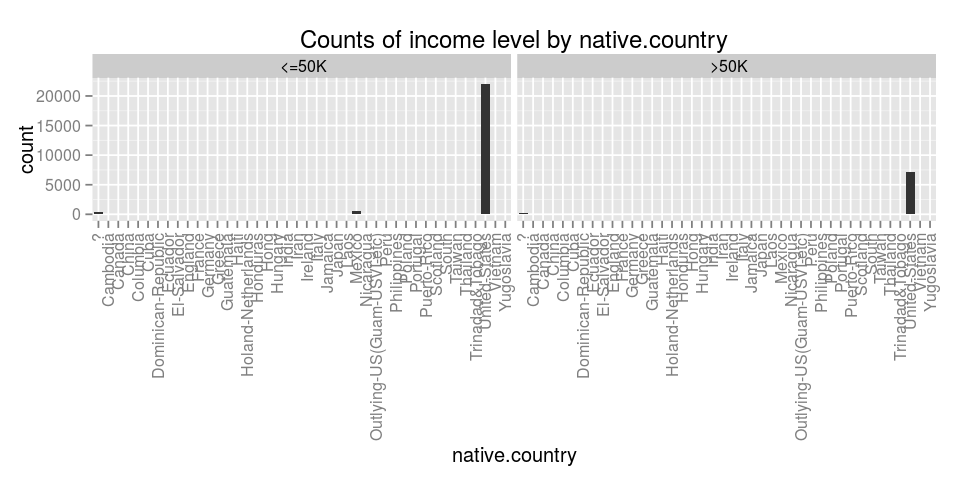

In [17]:
# Bar plot of categorical features
bar_income <- function(x) {
    if(!is.numeric(income[, x])) {
        capture.output(plot(
            ggplot(income, aes_string(x)) +
            geom_bar() + facet_grid(. ~ income) +
            theme(axis.text.x = element_text(angle = 90,
                                             hjust = 1,
                                             vjust = 0.5)) +
            ggtitle(paste('Counts of income level by', x))
                           ))
    }
}

# Set up plot area
options(repr.plot.width = 8, repr.plot.height = 4)

# Features to plot
name_list <- function(x) {
    names <- names(x)
    len <- length(names)
    names[-len]
}
feature_names <- name_list(income)
lapply(feature_names, bar_income)

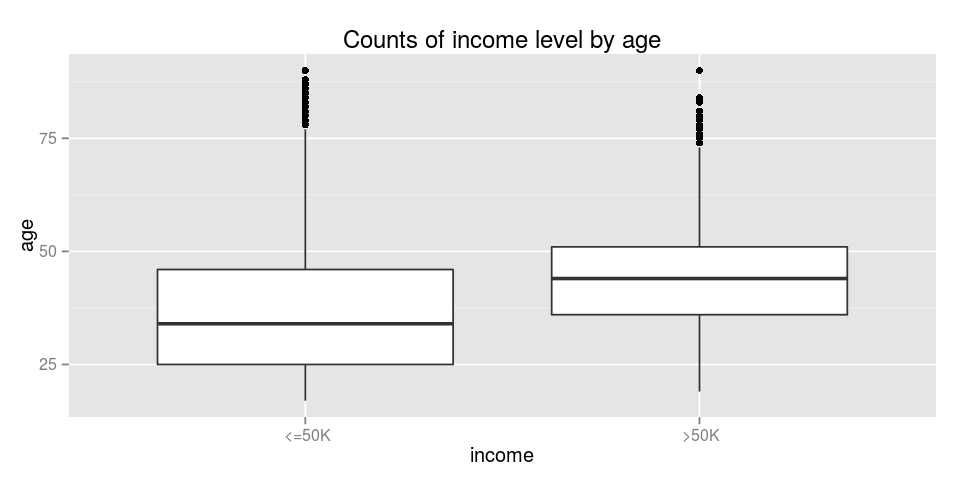

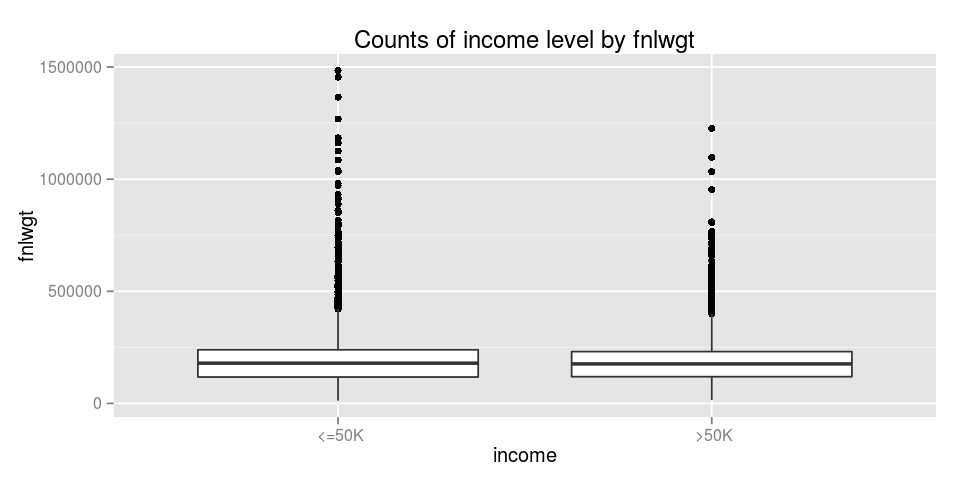

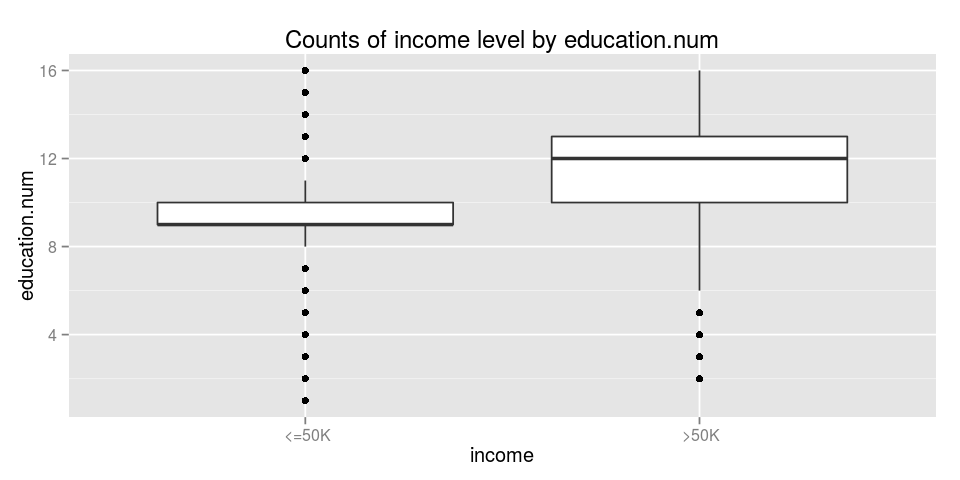

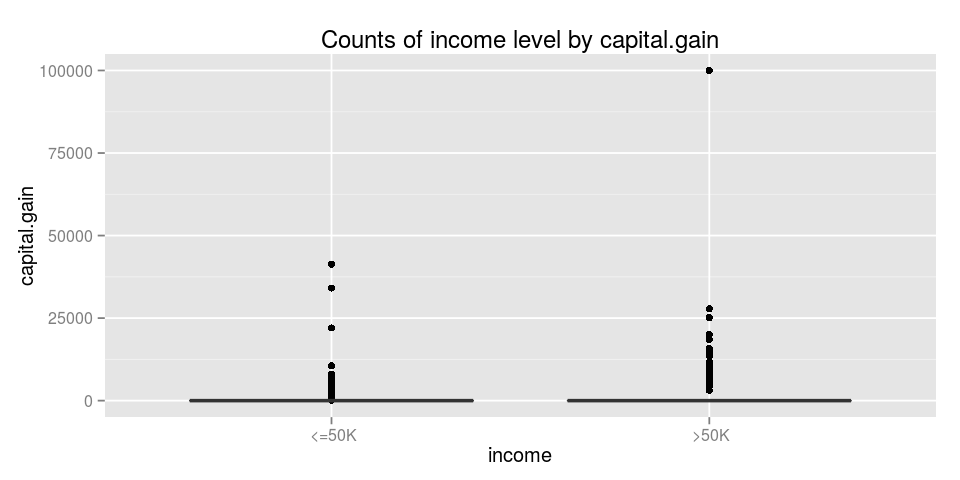

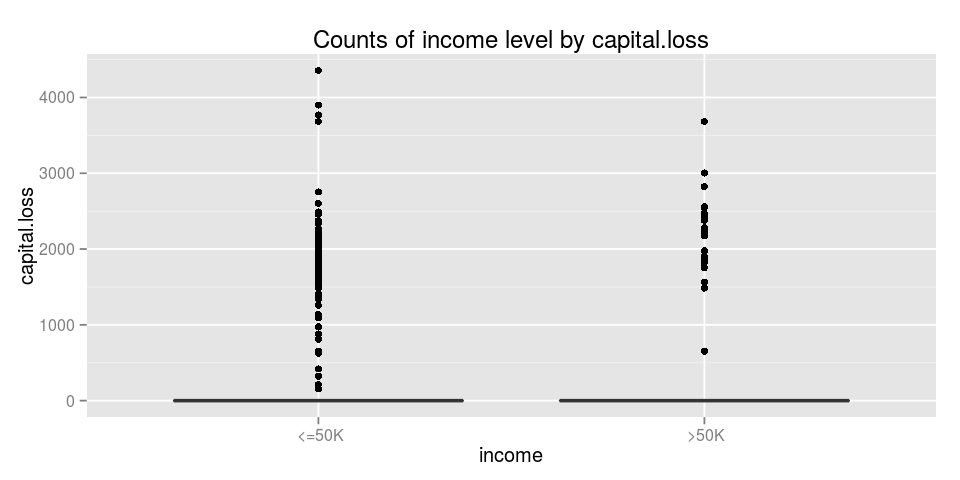

[[1]]
character(0)

[[2]]
NULL

[[3]]
character(0)

[[4]]
NULL

[[5]]
character(0)

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
character(0)

[[12]]
character(0)

[[13]]
character(0)

[[14]]
NULL

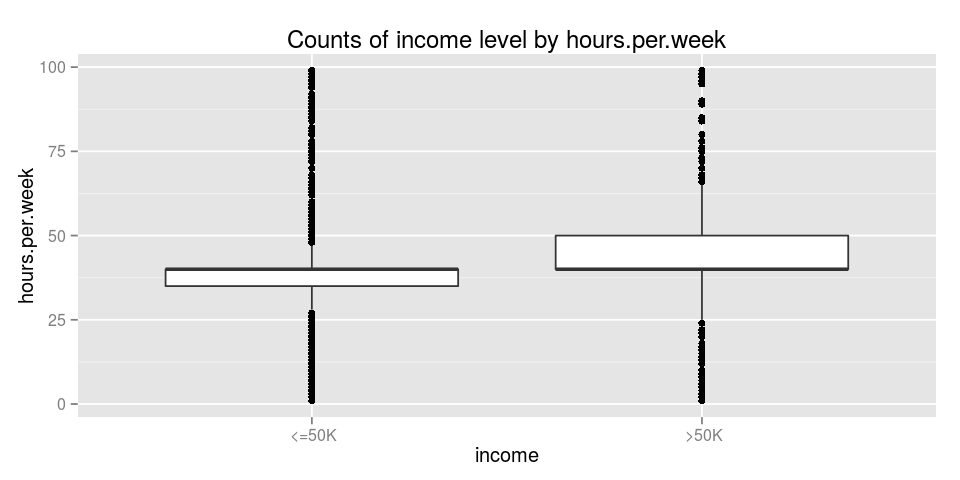

In [18]:
# Create box plot of numeric features
box_income <- function(x) {
    if(is.numeric(income[, x])) {
        capture.output(plot(
            ggplot(income, aes_string('income', x)) +
            geom_boxplot() +
            ggtitle(paste('Counts of income level by', x))
        ))
    }
}
lapply(feature_names, box_income)